In [1]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"GPU: {device}")


GPU: cuda


In [2]:
import time

start_time_code = time.time()

## Import Library

In [3]:
# import stanza
# stanza.download('id')


In [4]:
import pandas as pd
import numpy as np
import nltk, re, string

from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import torch
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
import time


import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nlp_id.lemmatizer import Lemmatizer

from sklearn.model_selection import train_test_split

import joblib

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('tokenize')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

c:\Users\asus.LAPTOP-P9TBK6TS.000\anaconda3\envs\skripsi-fix\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to C:\Users\asus.LAPTOP-
[nltk_data]     P9TBK6TS.000\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\asus.LAPTOP-
[nltk_data]     P9TBK6TS.000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\asus.LAPTOP-
[nltk_data]     P9TBK6TS.000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading tokenize: Package 'tokenize' not found in
[nltk_data]     index
[nltk_data] Downloading package averaged_perceptron_tagger to C:\Users
[nltk_data]     \asus.LAPTO

True

In [5]:
import requests
from io import StringIO

response = requests.get\
    ('https://raw.githubusercontent.com/MysterieuxMan/pilpres2024/main/1000%20tweet.csv')

data_req_fix = response.content.decode('utf-8')

data = pd.read_csv(StringIO(response.text))

data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.770000e+18,Wed Mar 13 05:08:08 +0000 2024,0,Prabowo-Gibran memimpin dengan perolehan suara...,1.770000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17677...,NaN,in,NaN,0,0,0,https://x.com/RElnanda10837/status/17677796549...,1.720000e+18,RElnanda10837
1,1.770000e+18,Wed Mar 13 05:07:49 +0000 2024,0,Prabowo-Gibran semakin kuat di puncak peroleha...,1.770000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17677...,NaN,in,"Kota Manado, Sulawesi Utara",0,0,0,https://x.com/tiaraacantikka/status/1767779575...,1.720000e+18,tiaraacantikka
2,1.770000e+18,Wed Mar 13 05:07:48 +0000 2024,0,Prabowo-Gibran unggul dengan perolehan suara y...,1.770000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17677...,NaN,in,"Setia Budi, Indonesia",0,0,0,https://x.com/zasiarenia/status/17677795719135...,1.710000e+18,zasiarenia
3,1.770000e+18,Wed Mar 13 05:07:27 +0000 2024,1,Prabowo-Gibran terus menunjukkan keunggulan da...,1.770000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17677...,NaN,in,"Tambora, Indonesia",0,0,0,https://x.com/Arunamatatas/status/176777948378...,1.700000e+18,Arunamatatas
4,1.770000e+18,Wed Mar 13 05:07:19 +0000 2024,0,Suara rakyat memberikan kepercayaan pada Prabo...,1.770000e+18,https://pbs.twimg.com/media/GIhqCOfaYAAWUrm.jpg,NaN,in,"Gambir, Indonesia",0,0,0,https://x.com/GitaCarmen35/status/176777944970...,1.700000e+18,GitaCarmen35


In [6]:
display(data)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.770000e+18,Wed Mar 13 05:08:08 +0000 2024,0,Prabowo-Gibran memimpin dengan perolehan suara...,1.770000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17677...,NaN,in,NaN,0,0,0,https://x.com/RElnanda10837/status/17677796549...,1.720000e+18,RElnanda10837
1,1.770000e+18,Wed Mar 13 05:07:49 +0000 2024,0,Prabowo-Gibran semakin kuat di puncak peroleha...,1.770000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17677...,NaN,in,"Kota Manado, Sulawesi Utara",0,0,0,https://x.com/tiaraacantikka/status/1767779575...,1.720000e+18,tiaraacantikka
2,1.770000e+18,Wed Mar 13 05:07:48 +0000 2024,0,Prabowo-Gibran unggul dengan perolehan suara y...,1.770000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17677...,NaN,in,"Setia Budi, Indonesia",0,0,0,https://x.com/zasiarenia/status/17677795719135...,1.710000e+18,zasiarenia
3,1.770000e+18,Wed Mar 13 05:07:27 +0000 2024,1,Prabowo-Gibran terus menunjukkan keunggulan da...,1.770000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17677...,NaN,in,"Tambora, Indonesia",0,0,0,https://x.com/Arunamatatas/status/176777948378...,1.700000e+18,Arunamatatas
4,1.770000e+18,Wed Mar 13 05:07:19 +0000 2024,0,Suara rakyat memberikan kepercayaan pada Prabo...,1.770000e+18,https://pbs.twimg.com/media/GIhqCOfaYAAWUrm.jpg,NaN,in,"Gambir, Indonesia",0,0,0,https://x.com/GitaCarmen35/status/176777944970...,1.700000e+18,GitaCarmen35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10091,1.770000e+18,Sun Mar 10 13:59:00 +0000 2024,0,@PartaiSocmed #pilpres2024,1.770000e+18,NaN,PartaiSocmed,qme,Indonesia.,0,0,0,https://x.com/ErickConstant14/status/176682608...,9.710000e+17,ErickConstant14
10092,1.770000e+18,Sun Mar 10 08:08:43 +0000 2024,12,#pinetwork #Pilpres2024 2023å¹´Googleå¹¿å‘Šå•†...,1.770000e+18,NaN,NaN,zh,"Wan Chai District, Hong Kong",1,6,2,https://x.com/allenwo18517182/status/176673793...,1.430000e+18,allenwo18517182
10093,1.770000e+18,Sun Mar 10 07:01:37 +0000 2024,0,muak gua sama pendukung anies semua di kaitkan...,1.770000e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/Kevinalharix/status/176672105280...,1.750000e+18,Kevinalharix
10094,1.770000e+18,Sat Mar 09 16:24:17 +0000 2024,0,Ayoo. Perbanyak toa pada bulan ramadhan. #mena...,1.770000e+18,NaN,NaN,in,indonesia,0,0,0,https://x.com/iwanlaskargayo/status/1766500264...,2.151783e+08,iwanlaskargayo


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10096 entries, 0 to 10095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      10096 non-null  float64
 1   created_at               10096 non-null  object 
 2   favorite_count           10096 non-null  int64  
 3   full_text                10093 non-null  object 
 4   id_str                   10096 non-null  float64
 5   image_url                3103 non-null   object 
 6   in_reply_to_screen_name  3441 non-null   object 
 7   lang                     10096 non-null  object 
 8   location                 6185 non-null   object 
 9   quote_count              10096 non-null  int64  
 10  reply_count              10096 non-null  int64  
 11  retweet_count            10096 non-null  int64  
 12  tweet_url                10096 non-null  object 
 13  user_id_str              10096 non-null  float64
 14  username              

In [8]:
data.shape

(10096, 15)

In [9]:
data.isnull().sum()

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     3
id_str                        0
image_url                  6993
in_reply_to_screen_name    6655
lang                          0
location                   3911
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username                      0
dtype: int64

In [10]:
data.duplicated().sum()

341

## Data Cleansing

In [11]:
data = data.drop_duplicates()

In [12]:
data = data[data['lang'] == 'in']

In [13]:
data['full_text'] = data['full_text'].str.lower()

In [14]:
data = data[['created_at', 'username', 'full_text']]

In [15]:
def remove_tweet_special(text):
    # Menghapus tab, baris baru, dan back slice
    text = text.replace('\\t', ' ').replace('\\n', ' ').\
        replace('\\u', ' ').replace('\\', '')

    # Menghapus karakter non-ASCII (emotikon, huruf Cina, dll.)
    text = ''.join(char for char in text if ord(char) < 128)

    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", \
                           text).split())

    # Menghapus URL yang tidak lengkap
    text = text.replace("http://", " ").replace("https://", " ")

    return text

def clean_text(data):
    # Menghapus karakter yang tidak diinginkan (_) dan karakter selain huruf
    data['full_text'] = data['full_text'].str.\
        replace(r"[^a-zA-Z ]+", " ").str.strip()

    # Mengganti multiple whitespace dengan single whitespace
    data['full_text'] = data['full_text'].\
        replace(" +", " ", regex=True)

    return data

def clean_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_numbers(text):
    return re.sub('[0-9]+', '', text)

data['clean_text'] = data['full_text'].apply(remove_tweet_special)
data['clean_text'] = data['clean_text'].apply(remove_numbers)
data['clean_text'] = data['clean_text'].apply(clean_punctuation)
data = clean_text(data)


<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\asus.LAPTOP-P9TBK6TS.000\AppData\Local\Temp\ipykernel_36784\3510339158.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", \


In [16]:
data.head()

,created_at,username,full_text,clean_text
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...


In [17]:
all_tweets = ' '.join(data['clean_text'])

# Mencetak beberapa karakter pertama untuk memverifikasi
print("Gabungan tweet (200 karakter pertama):")
print(all_tweets[:200])

# Mencetak total jumlah karakter
print(f"\nTotal jumlah karakter: {len(all_tweets)}")

# Mencetak jumlah kata unik
unique_words = set(all_tweets.split())
print(f"Jumlah kata unik: {len(unique_words)}")

Gabungan tweet (200 karakter pertama):
prabowogibran memimpin dengan perolehan suara yang mengesankan menandakan dukungan yang kuat dari rakyat inihasil dipilihrakyat prabowogibran semakin kuat di puncak perolehan suara inihasil dipilihrak

Total jumlah karakter: 1360632
Jumlah kata unik: 18149


## Data Pre-Processing

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def print_gpu_memory():
    if torch.cuda.is_available():
        print(f"GPU memory allocated: {torch.cuda.memory_allocated()/1e9:.2f} GB")
        print(f"GPU memory cached: {torch.cuda.memory_reserved()/1e9:.2f} GB")

start_time_class = time.time()

pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained).to(device)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

print(f"Model is on: {next(model.parameters()).device}")

print(f"Pipeline is using: {'GPU' if sentiment_analysis.device.type == 'cuda' else 'CPU'}")

# Mapping label
label_index = {'LABEL_0': 'positif', 'LABEL_1': 'netral', 'LABEL_2': 'negatif'}

def analyze_sentiment(text):
    result = sentiment_analysis(text)[0]
    label = label_index.get(result['label'], 'unknown')
    score = result['score']
    return label, score

data[['indoBert Classification', 'indoBERT Classification score']] = data['clean_text'].apply(analyze_sentiment).apply(pd.Series)

print(data.head())

end_time = time.time()

execution_time = end_time - start_time_class
print(f"Waktu eksekusi: {execution_time} detik")

print_gpu_memory()


Using device: cuda


c:\Users\asus.LAPTOP-P9TBK6TS.000\anaconda3\envs\skripsi-fix\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\asus.LAPTOP-P9TBK6TS.000\anaconda3\envs\skripsi-fix\Lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Model is on: cuda:0
Pipeline is using: GPU


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


                       created_at        username  \
0  Wed Mar 13 05:08:08 +0000 2024   RElnanda10837   
1  Wed Mar 13 05:07:49 +0000 2024  tiaraacantikka   
2  Wed Mar 13 05:07:48 +0000 2024      zasiarenia   
3  Wed Mar 13 05:07:27 +0000 2024    Arunamatatas   
4  Wed Mar 13 05:07:19 +0000 2024    GitaCarmen35   

                                           full_text  \
0  prabowo-gibran memimpin dengan perolehan suara...   
1  prabowo-gibran semakin kuat di puncak peroleha...   
2  prabowo-gibran unggul dengan perolehan suara y...   
3  prabowo-gibran terus menunjukkan keunggulan da...   
4  suara rakyat memberikan kepercayaan pada prabo...   

                                          clean_text indoBert Classification  \
0  prabowogibran memimpin dengan perolehan suara ...                 positif   
1  prabowogibran semakin kuat di puncak perolehan...                 positif   
2  prabowogibran unggul dengan perolehan suara ya...                 positif   
3  prabowogibran terus m

In [19]:
def tokenized(data):
  return data.apply(nltk.word_tokenize)

data['tokenized_text'] = tokenized(data['clean_text'])
data.head()

,created_at,username,full_text,clean_text,indoBert Classification,indoBERT Classification score,tokenized_text
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...,positif,0.979277,"[prabowogibran, memimpin, dengan, perolehan, s..."
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...,positif,0.789019,"[prabowogibran, semakin, kuat, di, puncak, per..."
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...,positif,0.895336,"[prabowogibran, unggul, dengan, perolehan, sua..."
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...,positif,0.511850,"[prabowogibran, terus, menunjukkan, keunggulan..."
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...,positif,0.954839,"[suara, rakyat, memberikan, kepercayaan, pada,..."


In [20]:
lemmatizer = Lemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

data['lemmatize_text'] = data['tokenized_text'].\
    apply(lemmatize_text)

data.head()

,created_at,username,full_text,clean_text,indoBert Classification,indoBERT Classification score,tokenized_text,lemmatize_text
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...,positif,0.979277,"[prabowogibran, memimpin, dengan, perolehan, s...","[prabowogibran, pimpin, dengan, oleh, suara, y..."
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...,positif,0.789019,"[prabowogibran, semakin, kuat, di, puncak, per...","[prabowogibran, makin, kuat, di, puncak, oleh,..."
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...,positif,0.895336,"[prabowogibran, unggul, dengan, perolehan, sua...","[prabowogibran, unggul, dengan, oleh, suara, y..."
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...,positif,0.511850,"[prabowogibran, terus, menunjukkan, keunggulan...","[prabowogibran, terus, tunjuk, unggul, dalam, ..."
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...,positif,0.954839,"[suara, rakyat, memberikan, kepercayaan, pada,...","[suara, rakyat, beri, percaya, pada, prabowogi..."


In [21]:
import requests
from io import StringIO

url_slang = 'https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv'

response = requests.get(url_slang)

data_req_slang = response.content.decode('utf-8')

data_slang = pd.read_csv(StringIO(data_req_slang), header=None,\
                          names=['slang', 'formal','In-dictionary',	'context',	\
                                 'category1',	'category2',	'category3'
])

data_slang.head()

,slang,formal,In-dictionary,context,category1,category2,category3
0,slang,formal,In-dictionary,context,category1,category2,category3
1,woww,wow,1,wow,elongasi,0,0
2,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
3,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
4,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0


In [22]:
import ast

def replace_slang(text_list):
    if isinstance(text_list, str):
        try:
            text_list = ast.literal_eval(text_list)
        except:
            return text_list  

    for i in range(len(text_list)):
        slang_word = data_slang[data_slang['slang'] == text_list[i]]
        if not slang_word.empty:
            text_list[i] = slang_word['formal'].values[0]
    return text_list

data['unslang_text'] = data['lemmatize_text'].apply(replace_slang)

In [23]:
data.head()

,created_at,username,full_text,clean_text,indoBert Classification,indoBERT Classification score,tokenized_text,lemmatize_text,unslang_text
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...,positif,0.979277,"[prabowogibran, memimpin, dengan, perolehan, s...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, dengan, oleh, suara, y..."
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...,positif,0.789019,"[prabowogibran, semakin, kuat, di, puncak, per...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, makin, kuat, di, puncak, oleh,..."
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...,positif,0.895336,"[prabowogibran, unggul, dengan, perolehan, sua...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, dengan, oleh, suara, y..."
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...,positif,0.511850,"[prabowogibran, terus, menunjukkan, keunggulan...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, terus, tunjuk, unggul, dalam, ..."
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...,positif,0.954839,"[suara, rakyat, memberikan, kepercayaan, pada,...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, beri, percaya, pada, prabowogi..."


In [24]:
def remove_stopwords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: \
                    [item for item in x if item not in stop_words])

data['freestop_text'] = remove_stopwords\
  (data['unslang_text'])

In [25]:
data.head()

,created_at,username,full_text,clean_text,indoBert Classification,indoBERT Classification score,tokenized_text,lemmatize_text,unslang_text,freestop_text
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...,positif,0.979277,"[prabowogibran, memimpin, dengan, perolehan, s...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, suara, kesan, tanda, d..."
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...,positif,0.789019,"[prabowogibran, semakin, kuat, di, puncak, per...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, kuat, puncak, suara, inihasil,..."
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...,positif,0.895336,"[prabowogibran, unggul, dengan, perolehan, sua...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, suara, gempar, inihasi..."
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...,positif,0.511850,"[prabowogibran, terus, menunjukkan, keunggulan...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, unggul, suara, inihasil, dipil..."
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...,positif,0.954839,"[suara, rakyat, memberikan, kepercayaan, pada,...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, percaya, prabowogibran, suara,..."


In [26]:
data.dropna(inplace=True)

In [27]:
data['tweet_text'] = data['freestop_text'].apply(lambda x: ' '.join(x))
data.head()

,created_at,username,full_text,clean_text,indoBert Classification,indoBERT Classification score,tokenized_text,lemmatize_text,unslang_text,freestop_text,tweet_text
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...,positif,0.979277,"[prabowogibran, memimpin, dengan, perolehan, s...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, suara, kesan, tanda, d...",prabowogibran pimpin suara kesan tanda dukung ...
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...,positif,0.789019,"[prabowogibran, semakin, kuat, di, puncak, per...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, kuat, puncak, suara, inihasil,...",prabowogibran kuat puncak suara inihasil dipil...
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...,positif,0.895336,"[prabowogibran, unggul, dengan, perolehan, sua...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, suara, gempar, inihasi...",prabowogibran unggul suara gempar inihasil dip...
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...,positif,0.511850,"[prabowogibran, terus, menunjukkan, keunggulan...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, unggul, suara, inihasil, dipil...",prabowogibran unggul suara inihasil dipilihrakyat
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...,positif,0.954839,"[suara, rakyat, memberikan, kepercayaan, pada,...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, percaya, prabowogibran, suara,...",suara rakyat percaya prabowogibran suara kesan...


### Labelling Data

### IndoBERT Classification

In [28]:
data.head()

,created_at,username,full_text,clean_text,indoBert Classification,indoBERT Classification score,tokenized_text,lemmatize_text,unslang_text,freestop_text,tweet_text
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...,positif,0.979277,"[prabowogibran, memimpin, dengan, perolehan, s...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, suara, kesan, tanda, d...",prabowogibran pimpin suara kesan tanda dukung ...
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...,positif,0.789019,"[prabowogibran, semakin, kuat, di, puncak, per...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, kuat, puncak, suara, inihasil,...",prabowogibran kuat puncak suara inihasil dipil...
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...,positif,0.895336,"[prabowogibran, unggul, dengan, perolehan, sua...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, suara, gempar, inihasi...",prabowogibran unggul suara gempar inihasil dip...
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...,positif,0.511850,"[prabowogibran, terus, menunjukkan, keunggulan...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, unggul, suara, inihasil, dipil...",prabowogibran unggul suara inihasil dipilihrakyat
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...,positif,0.954839,"[suara, rakyat, memberikan, kepercayaan, pada,...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, percaya, prabowogibran, suara,...",suara rakyat percaya prabowogibran suara kesan...


In [29]:
# data.to_csv('experiment.csv', index=False)

## Visualisasi Data

In [30]:
all_tweets_clean = ' '.join(data['tweet_text'])

print("Gabungan tweet (200 karakter pertama):")
print(all_tweets_clean[:200])

print(f"\nTotal jumlah karakter: {len(all_tweets_clean)}")

unique_words = set(all_tweets_clean.split())
print(f"Jumlah kata unik: {len(unique_words)}")

Gabungan tweet (200 karakter pertama):
prabowogibran pimpin suara kesan tanda dukung kuat rakyat inihasil dipilihrakyat prabowogibran kuat puncak suara inihasil dipilihrakyat prabowogibran unggul suara gempar inihasil dipilihrakyat prabowo

Total jumlah karakter: 832733
Jumlah kata unik: 12802


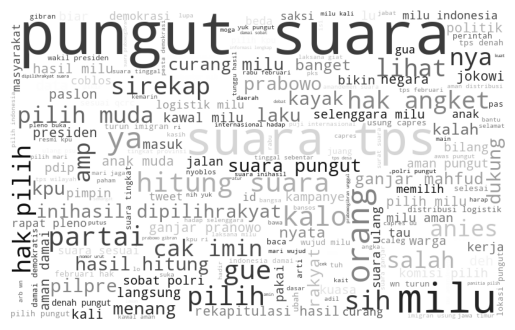

In [31]:
all_tweets_clean = ' '.join(data['tweet_text'])

wc = WordCloud(background_color='white', colormap\
                = 'binary',
     stopwords = ['meta'], width = 800, height = 500)\
        .generate(all_tweets_clean)
plt.axis("off")
plt.imshow(wc)

C:\Users\asus.LAPTOP-P9TBK6TS.000\AppData\Local\Temp\ipykernel_36784\1470016261.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_top_10, palette='viridis')  # Menggunakan palet 'viridis'


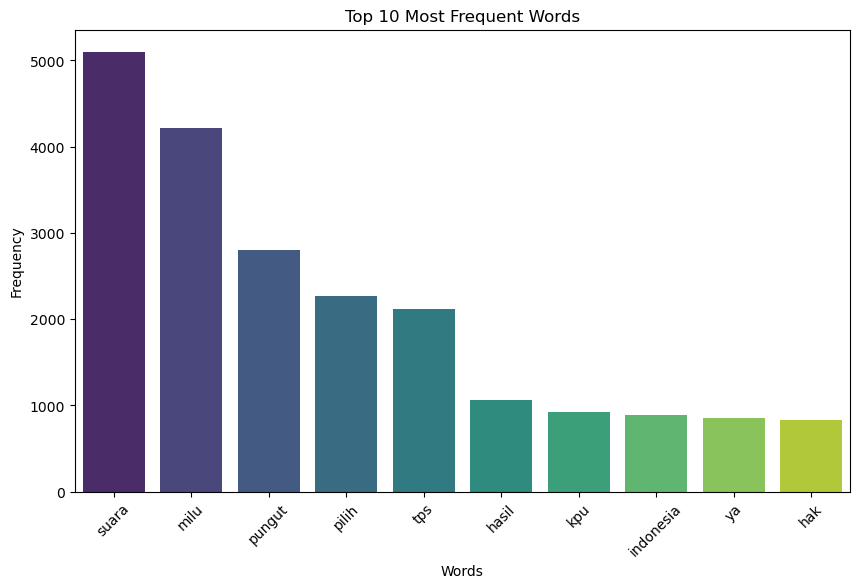

In [32]:
words = all_tweets_clean.split()

# Hitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Ambil 10 kata terbanyak
top_10_words = word_counts.most_common(10)

# Konversi ke DataFrame untuk digunakan di seaborn
df_top_10 = pd.DataFrame(top_10_words, columns=['word', 'count'])

# Plot barchart menggunakan seaborn dengan palet warna
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_top_10, palette='viridis')  # Menggunakan palet 'viridis'
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

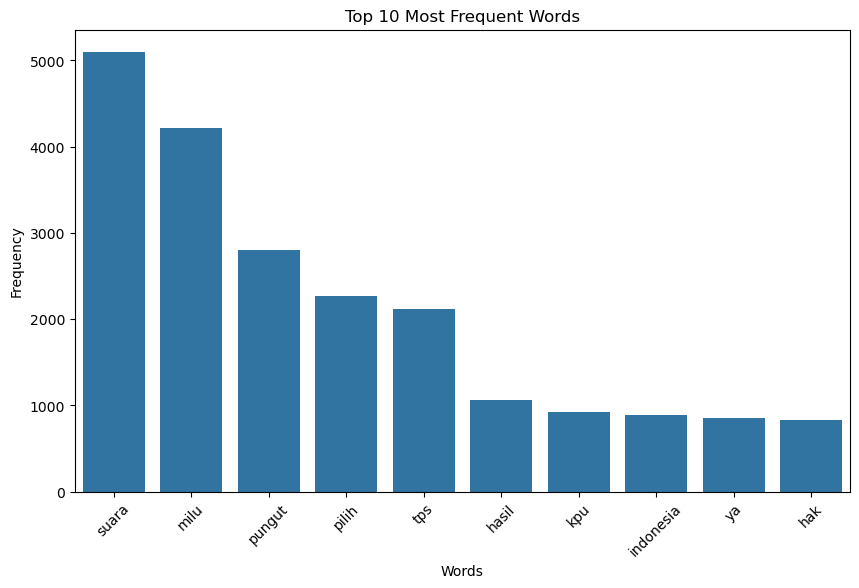

In [33]:


clean_text = re.sub(r'[^\w\s]', '', all_tweets_clean.lower())

# Pecah teks menjadi daftar kata-kata
words = clean_text.split()

# Hitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Ambil 10 kata terbanyak
top_10_words = word_counts.most_common(10)

# Konversi ke DataFrame untuk digunakan di seaborn
df_top_10 = pd.DataFrame(top_10_words, columns=['word', 'count'])

# Plot barchart menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_top_10)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()


In [34]:
data['indoBert Classification'].value_counts()

indoBert Classification
netral     4397
negatif    3494
positif    1356
Name: count, dtype: int64

## Modelling

In [35]:
X = data['full_text']
y = data['indoBert Classification']

Tfidf_vect = TfidfVectorizer(max_features=5000)
X_train_Tfidf = Tfidf_vect.fit_transform(X)

sampler = SMOTE()
tfidf_vector, y = sampler.fit_resample(X_train_Tfidf, y)
print(tfidf_vector.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, y, test_size=0.3, random_state=42)

models = {
    'Naive Bayes': naive_bayes.MultinomialNB(),
    'SVM': SVC(probability=True)
}

param_grids = {
    'Naive Bayes': {'alpha': [0.1, 0.5, 1.0]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
}

best_models = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

    y_pred = best_models[name].predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

(13191, 5000)
(13191,)

Naive Bayes Accuracy: 0.8125
              precision    recall  f1-score   support

     negatif       0.72      0.95      0.82      1325
      netral       0.93      0.76      0.84      1326
     positif       0.84      0.72      0.78      1307

    accuracy                           0.81      3958
   macro avg       0.83      0.81      0.81      3958
weighted avg       0.83      0.81      0.81      3958


SVM Accuracy: 0.8898
              precision    recall  f1-score   support

     negatif       0.85      0.89      0.87      1325
      netral       0.94      0.85      0.89      1326
     positif       0.89      0.93      0.91      1307

    accuracy                           0.89      3958
   macro avg       0.89      0.89      0.89      3958
weighted avg       0.89      0.89      0.89      3958



In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform, randint

X = data['full_text']
y = data['indoBert Classification']

# Split data

random_model = {}

models = {
    'Naive Bayes': (MultinomialNB(), {'alpha': uniform(0.1, 1.0)}),
    'SVM': (LinearSVC(dual=False), {'C': uniform(0.1, 10), 'max_iter': randint(1000, 2000)})
}

# Fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate(name, model, param_distributions):
    print(f"\nTraining {name}...")
    random_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    return best_model

# Latih dan evaluasi setiap model
# best_models = {}
for name, (model, param_dist) in models.items():
    random_model[name] = train_and_evaluate(name, model, param_dist)

print("Training and evaluation completed.")


Training Naive Bayes...
Naive Bayes Accuracy: 0.8090
              precision    recall  f1-score   support

     negatif       0.72      0.95      0.82      1325
      netral       0.93      0.76      0.83      1326
     positif       0.84      0.71      0.77      1307

    accuracy                           0.81      3958
   macro avg       0.83      0.81      0.81      3958
weighted avg       0.83      0.81      0.81      3958


Training SVM...
SVM Accuracy: 0.8605
              precision    recall  f1-score   support

     negatif       0.87      0.81      0.84      1325
      netral       0.89      0.83      0.86      1326
     positif       0.83      0.95      0.88      1307

    accuracy                           0.86      3958
   macro avg       0.86      0.86      0.86      3958
weighted avg       0.86      0.86      0.86      3958

Training and evaluation completed.


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TF-IDF Vectorization dengan jumlah fitur yang lebih sedikit
Tfidf_vect = TfidfVectorizer(max_features=5000)
X_train_Tfidf = Tfidf_vect.fit_transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

# SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_Tfidf, y_train)
# KFold dengan 10 fold
model = best_models['Naive Bayes']

# Definisikan KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menyimpan hasil akurasi setiap fold
accuracy_scores = []

# List untuk menyimpan classification report setiap fold
classification_reports = []

# Lakukan validasi silang manual
for fold, (train_index, test_index) in enumerate(kf.split(X_train_resampled)):
    # Pisahkan data ke dalam train dan test set berdasarkan fold
    X_train_fold, X_test_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_test_fold = y_train_resampled[train_index], y_train_resampled[test_index]

    # Fit model dengan data training
    model.fit(X_train_fold, y_train_fold)

    # Prediksi data test
    y_pred = model.predict(X_test_fold)

    # Hitung accuracy
    acc = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(acc)

    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

    # Hitung classification report
    report = classification_report(y_test_fold, y_pred, output_dict=True)
    classification_reports.append(report)

    # Tampilkan hasil per fold
    print(f"Fold {fold + 1}:")
    print(f"Fold {fold+1}: {scores[fold]:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test_fold, y_pred))

# Tampilkan rata-rata akurasi
print(f"\nRata-rata akurasi: {np.mean(accuracy_scores):.4f}")
print(f"\nRata-rata cross_val_acc: {scores.mean():.4f}")


Fold 1:
Fold 1: 0.7792
Accuracy: 0.8420
              precision    recall  f1-score   support

     negatif       0.77      0.94      0.85       317
      netral       0.94      0.78      0.85       307
     positif       0.85      0.80      0.83       300

    accuracy                           0.84       924
   macro avg       0.85      0.84      0.84       924
weighted avg       0.85      0.84      0.84       924

Fold 2:
Fold 2: 0.8052
Accuracy: 0.8139
              precision    recall  f1-score   support

     negatif       0.72      0.94      0.81       299
      netral       0.94      0.78      0.86       302
     positif       0.83      0.73      0.78       323

    accuracy                           0.81       924
   macro avg       0.83      0.82      0.82       924
weighted avg       0.83      0.81      0.81       924

Fold 3:
Fold 3: 0.8074
Accuracy: 0.8214
              precision    recall  f1-score   support

     negatif       0.73      0.95      0.83       315
      net

In [38]:
# Definisikan model
model = random_model['Naive Bayes']

# Definisikan KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TF-IDF Vectorization dengan jumlah fitur yang lebih sedikit
Tfidf_vect = TfidfVectorizer(max_features=5000)
X_train_Tfidf = Tfidf_vect.fit_transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

# SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_Tfidf, y_train)

# Definisikan KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menyimpan hasil akurasi setiap fold
accuracy_scores = []

# List untuk menyimpan classification report setiap fold
classification_reports = []

# Lakukan validasi silang manual
for fold, (train_index, test_index) in enumerate(kf.split(X_train_resampled)):
    # Pisahkan data ke dalam train dan test set berdasarkan fold
    X_train_fold, X_test_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_test_fold = y_train_resampled[train_index], y_train_resampled[test_index]

    # Fit model dengan data training
    model.fit(X_train_fold, y_train_fold)

    # Prediksi data test
    y_pred = model.predict(X_test_fold)

    # Hitung accuracy
    acc = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(acc)

    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

    # Hitung classification report
    report = classification_report(y_test_fold, y_pred, output_dict=True)
    classification_reports.append(report)

    # Tampilkan hasil per fold
    print(f"Fold {fold + 1}:")
    print(f"Fold {fold+1}: {scores[fold]:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test_fold, y_pred))

# Tampilkan rata-rata akurasi
print(f"\nRata-rata akurasi: {np.mean(accuracy_scores):.4f}")
print(f"\nRata-rata cross_val_acc: {scores.mean():.4f}")


Fold 1:
Fold 1: 0.7695
Accuracy: 0.8398
              precision    recall  f1-score   support

     negatif       0.77      0.94      0.85       317
      netral       0.94      0.78      0.85       307
     positif       0.85      0.80      0.82       300

    accuracy                           0.84       924
   macro avg       0.85      0.84      0.84       924
weighted avg       0.85      0.84      0.84       924

Fold 2:
Fold 2: 0.7955
Accuracy: 0.8041
              precision    recall  f1-score   support

     negatif       0.71      0.93      0.81       299
      netral       0.93      0.78      0.85       302
     positif       0.82      0.71      0.76       323

    accuracy                           0.80       924
   macro avg       0.82      0.81      0.81       924
weighted avg       0.82      0.80      0.80       924

Fold 3:
Fold 3: 0.8074
Accuracy: 0.8171
              precision    recall  f1-score   support

     negatif       0.72      0.95      0.82       315
      net

In [39]:
# Definisikan model
model = random_model['SVM']

# Definisikan KFold
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_Tfidf, y_train)
# KFold dengan 10 fold
# model = best_models['Naive Bayes']

# Definisikan KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menyimpan hasil akurasi setiap fold
accuracy_scores = []

# List untuk menyimpan classification report setiap fold
classification_reports = []

# Lakukan validasi silang manual
for fold, (train_index, test_index) in enumerate(kf.split(X_train_resampled)):
    # Pisahkan data ke dalam train dan test set berdasarkan fold
    X_train_fold, X_test_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_test_fold = y_train_resampled[train_index], y_train_resampled[test_index]

    # Fit model dengan data training
    model.fit(X_train_fold, y_train_fold)

    # Prediksi data test
    y_pred = model.predict(X_test_fold)

    # Hitung accuracy
    acc = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(acc)

    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

    # Hitung classification report
    report = classification_report(y_test_fold, y_pred, output_dict=True)
    classification_reports.append(report)

    # Tampilkan hasil per fold
    print(f"Fold {fold + 1}:")
    print(f"Fold {fold+1}: {scores[fold]:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test_fold, y_pred))

# Tampilkan rata-rata akurasi
print(f"\nRata-rata akurasi: {np.mean(accuracy_scores):.4f}")
print(f"\nRata-rata cross_val_acc: {scores.mean():.4f}")



Fold 1:
Fold 1: 0.8333
Accuracy: 0.8777
              precision    recall  f1-score   support

     negatif       0.90      0.83      0.86       317
      netral       0.93      0.84      0.88       307
     positif       0.82      0.97      0.89       300

    accuracy                           0.88       924
   macro avg       0.88      0.88      0.88       924
weighted avg       0.88      0.88      0.88       924

Fold 2:
Fold 2: 0.8680
Accuracy: 0.8864
              precision    recall  f1-score   support

     negatif       0.91      0.83      0.87       299
      netral       0.92      0.86      0.89       302
     positif       0.85      0.97      0.90       323

    accuracy                           0.89       924
   macro avg       0.89      0.88      0.89       924
weighted avg       0.89      0.89      0.89       924

Fold 3:
Fold 3: 0.8647
Accuracy: 0.8658
              precision    recall  f1-score   support

     negatif       0.84      0.84      0.84       315
      net

In [40]:
# joblib.dump(best_models['Naive Bayes'], 'naive_bayes_ex.joblib')
joblib.dump(random_model['SVM'], 'SVM_exs.joblib')

['SVM_exs.joblib']

In [41]:
data['indoBert Classification'].value_counts()

indoBert Classification
netral     4397
negatif    3494
positif    1356
Name: count, dtype: int64

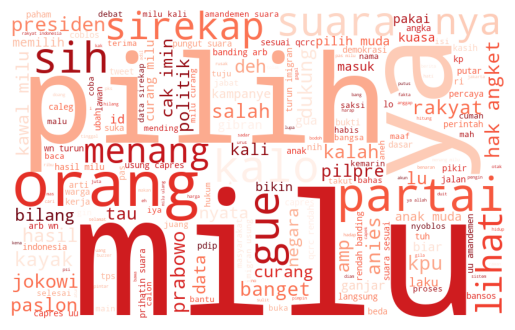

In [42]:
negative_tweets = data[data['indoBert Classification']\
                        == 'negatif']['tweet_text']

all_negative_tweets = " ".join(tweet for tweet in \
                               negative_tweets)

wc = WordCloud(background_color='white', colormap='Reds',
               stopwords=['meta'], width=800, height=500)\
                .generate(all_negative_tweets)

plt.axis("off")
plt.imshow(wc)
plt.show()


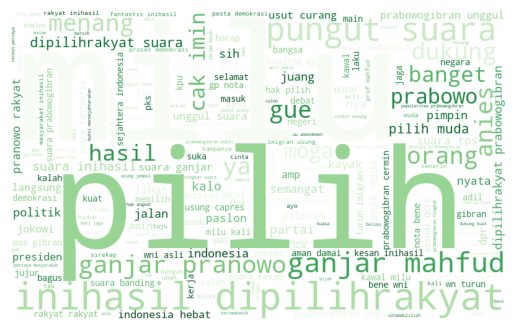

In [43]:
negative_tweets = data[data['indoBert Classification']\
                        == 'positif']['tweet_text']

all_negative_tweets = " ".join(tweet for tweet in \
                               negative_tweets)

wc = WordCloud(background_color='white', colormap='Greens',
               stopwords=['meta'], width=800, height=500)\
                .generate(all_negative_tweets)

plt.axis("off")
plt.imshow(wc)
plt.show()


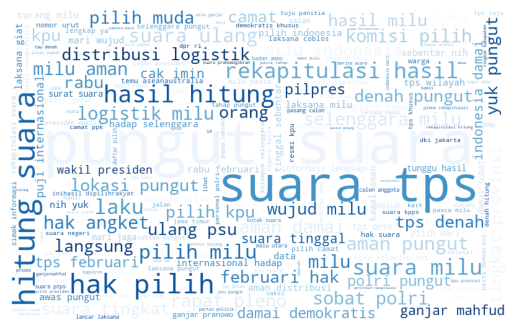

In [44]:
negative_tweets = data[data['indoBert Classification']\
                        == 'netral']['tweet_text']

all_negative_tweets = " ".join(tweet for tweet in \
                               negative_tweets)

wc = WordCloud(background_color='white', colormap='Blues',
               stopwords=['meta'], width=800, height=500)\
                .generate(all_negative_tweets)

plt.axis("off")
plt.imshow(wc)
plt.show()

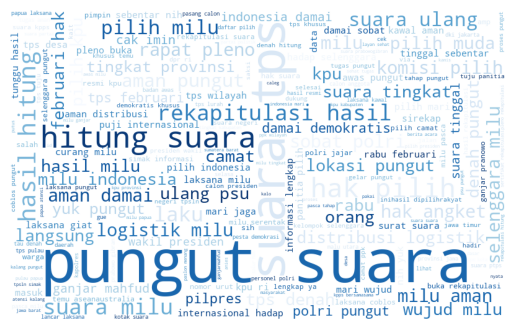

In [45]:
if data['indoBert Classification'].str.contains('netral').any():
    negative_tweets = data[data['indoBert Classification']\
                            == 'netral']['tweet_text']

    all_negative_tweets = " ".join(tweet for tweet in\
                                    negative_tweets)

    wc = WordCloud(background_color='white', colormap='Blues',
                  stopwords=['meta'], width=800, height=500)\
                    .generate(all_negative_tweets)
    plt.axis("off")
    plt.imshow(wc)
    plt.show()

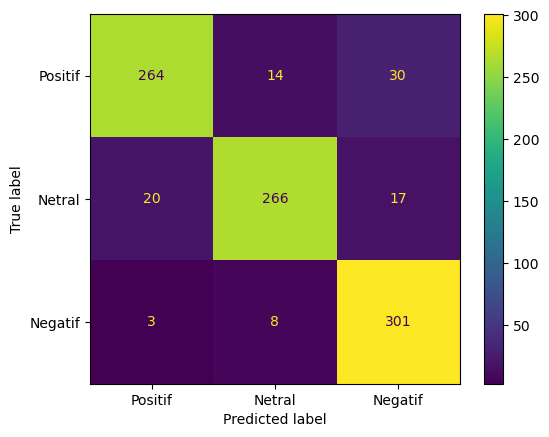

In [46]:
cm = confusion_matrix(y_test_fold, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Positif', 'Netral', 'Negatif'])
cm.plot()

plt.grid(False)
plt.show()

In [48]:
data.to_csv('sentiment svmss.csv', index=False)

In [49]:
end_time_code = time.time()

execution_time = end_time_code - start_time_code
print(f"Waktu eksekusi: {execution_time} detik")

Waktu eksekusi: 1174.0816559791565 detik


In [50]:
pretrained= "mdhugol/indonesia-bert-sentiment-classification"

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

pos_text = "Sangat bahagia hari ini"
neg_text = "Dasar anak sialan!! Kurang ajar!!"

result = sentiment_analysis(pos_text)
status = label_index[result[0]['label']]
score = result[0]['score']
print(f'Text: {pos_text} | Label : {status} ({score * 100:.3f}%)')

result = sentiment_analysis(neg_text)
status = label_index[result[0]['label']]
score = result[0]['score']
print(f'Text: {neg_text} | Label : {status} ({score * 100:.3f}%)')

c:\Users\asus.LAPTOP-P9TBK6TS.000\anaconda3\envs\skripsi-fix\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Text: Sangat bahagia hari ini | Label : positive (99.481%)
Text: Dasar anak sialan!! Kurang ajar!! | Label : negative (99.828%)


In [53]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained= "mdhugol/indonesia-bert-sentiment-classification"

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

pos_text = "moga pemilu 2024 menghasilkan pemimpin yg bijak adil dan merakyat bukan krn kepentingan dan politisasi"
neg_text = "moga milu hasil pimpin bijak adil rakyat politisasi"

result = sentiment_analysis(pos_text)
status = label_index[result[0]['label']]
score = result[0]['score']
print(f'Text: {pos_text} | Label : {status} ({score * 100:.3f}%)')

result = sentiment_analysis(neg_text)
status = label_index[result[0]['label']]
score = result[0]['score']
print(f'Text: {neg_text} | Label : {status} ({score * 100:.3f}%)')


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Text: moga pemilu 2024 menghasilkan pemimpin yg bijak adil dan merakyat bukan krn kepentingan dan politisasi | Label : positive (94.181%)
Text: moga milu hasil pimpin bijak adil rakyat politisasi | Label : negative (82.920%)
